# Lab 10
Peachyapa Saengcharoentrakul | INFO 370 | Ott Toomet

In [1]:
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from matplotlib.image import imread # widthxhxc
import numpy as np
import statsmodels.formula.api as smf
from decimal import Decimal
import math
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import cross_val_score

In [2]:
# 1.1
mnist = load_digits()

X = mnist.data
y = mnist.target

print("Image data: ", X.shape) # flattened crap; 8 x 8
print("First 10 labels:" , y[:10])

Image data:  (1797, 64)
First 10 labels: [0 1 2 3 4 5 6 7 8 9]


**(1.2)** There are 10 digits in the data and there are 64 pixels per digit

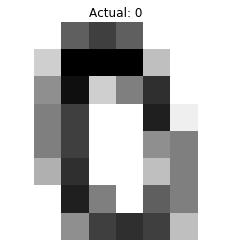

In [3]:
# 1.3
i = 78
plt.imshow(X[i].reshape((8,8)), cmap='gray_r')

_ = plt.axis("off")
plt.title(f"Actual: {y[i]}")

plt.show()

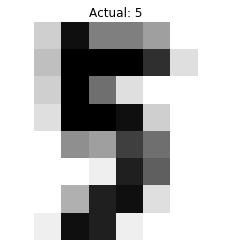

In [4]:
# 1.3
i = 35
plt.imshow(X[i].reshape((8,8)), cmap='gray_r')

_ = plt.axis("off")
plt.title(f"Actual: {y[i]}")

plt.show()

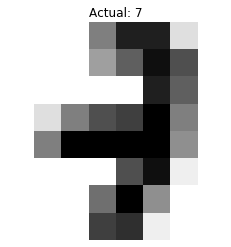

In [12]:
# 1.3
i = 27
plt.imshow(X[i].reshape((8,8)), cmap='gray_r')

_ = plt.axis("off")
plt.title(f"Actual: {y[i]}")

plt.show()

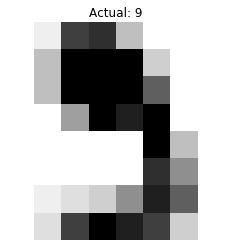

In [13]:
# 1.3
i = 73
plt.imshow(X[i].reshape((8,8)), cmap='gray_r')

_ = plt.axis("off")
plt.title(f"Actual: {y[i]}")

plt.show()

**(1.3)** I couldn't really tell 7 and 9 (I could guess 9 if you told me it was a digit but otherwise I might've thought it was a comma). 5 and 0 seem fine.

In [14]:
# 1.4
simplefilter("ignore", category=ConvergenceWarning)

In [15]:
max_iter = 500 # what

In [19]:
# 1.4
m = LogisticRegression(C = 1000, multi_class="multinomial", solver='lbfgs')
cv = cross_val_score(m, X, y, scoring="accuracy", cv=10)
cv.mean()

0.93095324539615

The accuracy is 92.9% which means there is a 92.9% chance of the model correctly predicting what digit the image is.

In [21]:
# 1.5
C_scores = [] # make a new list

for C_val in np.logspace(-6, 6, 13):
    m = LogisticRegression(C = C_val, multi_class="multinomial", solver='lbfgs')
    cv = cross_val_score(m, X, y, scoring="accuracy", cv=10)
    C_scores.append(cv.mean()) # append the mean to the list

In [22]:
C_scores

[0.7917518531606996,
 0.868561440547501,
 0.9064214770068689,
 0.9354028120519775,
 0.9415964039437792,
 0.932684494868466,
 0.9309897545814041,
 0.9293171803678462,
 0.9315123096006713,
 0.93095324539615,
 0.9315059970671362,
 0.9343642561952461,
 0.9304995258311667]

Text(0, 0.5, 'accuracy')

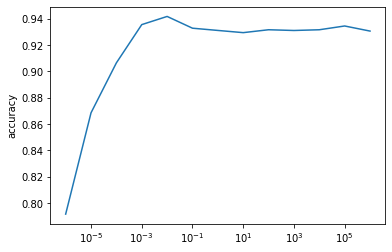

In [23]:
# 1.6 plotted
plt.plot(np.logspace(-6, 6, 13), C_scores)
plt.xscale("log")
plt.ylabel("accuracy")

10^-3 seems to give the highest accuracy.

# using imread

In [24]:
R = imread("Screen Shot 2021-03-10 at 09.19.13.png")
R.shape # 3D bc 4-colour channel RGB, transparency
R.flatten() 

FileNotFoundError: [Errno 2] No such file or directory: 'Screen Shot 2021-03-10 at 09.19.13.png'